# Sympy A first Glance
#### IsInstance and Type

In [1]:
print(isinstance(1, int)) ## boolean
print(isinstance(1.0, int))

True
False


## Basic Sympy

In [2]:
import sympy as sp
x = sp.Symbol('x')

print(x)
print(x**2)
sp.pprint(x**2)

x
x**2
 2
x 


In [4]:
# Sympy expressions are not functions

f = x**3 + sp.sin(x)
sp.pprint(f)
print(f(1))

 3         
x  + sin(x)


TypeError: 'Add' object is not callable

## Sympy Types

In [6]:
print(type(x))
print(type(sp.sin(x)*x))
print(type(x**2 + 2*x + 1), type((x+1)**2))

<class 'sympy.core.symbol.Symbol'>
<class 'sympy.core.mul.Mul'>
<class 'sympy.core.add.Add'> <class 'sympy.core.power.Pow'>


In [7]:
print(x**2 + 2*x + 1 == x+1**2)
print(x**2 + 2*x + 1 == 1 + 2*x + x**2)

False
True


In [9]:
print(sp.sqrt(2)/2 == 1/sp.sqrt(2))
sp.pprint(sp.sqrt(2)/ 2)
sp.pprint(1/sp.sqrt(2))
print(1/(1+sp.sqrt(2)) == (sp.sqrt(2) - 1))
sp.pprint(1/(1+sp.sqrt(2)))
sp.pprint(sp.sqrt(2) -1)

True
√2
──
2 
√2
──
2 
False
  1   
──────
1 + √2
-1 + √2


Sympy algebraic expressions like $\sin(x)+x^2$ are not callable functions, so one might imagine **what is the point of using Sympy** if you can't use algebraic expressions for their purpose?

Sympy allows us to convert their Sympy algebraic expressions into callable functions, with the lambdify command.

In [10]:
f = sp.sin(x**2)+x

F = sp.lambdify(x, f)

In [11]:
F(1)

1.8414709848078965

## Advantage of Sympy algebraic expressions
###### Like differentiation and integration

In [12]:
# Differentaition

fp = sp.diff(f, x)
sp.pprint(fp)

       ⎛ 2⎞    
2⋅x⋅cos⎝x ⎠ + 1


In [13]:
## Integration

f = x**3 + sp.cos(x)
sp.pprint(f)

F = sp.integrate(f, x)
sp.pprint(F)

 3         
x  + cos(x)
 4         
x          
── + sin(x)
4          


What would Sympy do if we ask it to integrate $f = \sin(x^2) $?

In [15]:
f = sp.sin(x**2)
F = sp.integrate(f, x)
sp.pprint(f)
sp.pprint(F)

   ⎛ 2⎞
sin⎝x ⎠
                ⎛√2⋅x⎞       
3⋅√2⋅√π⋅fresnels⎜────⎟⋅Γ(3/4)
                ⎝ √π ⎠       
─────────────────────────────
           8⋅Γ(7/4)          


In [16]:
sp.fresnels?

In [17]:
print(F)

3*sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*x/sqrt(pi))*gamma(3/4)/(8*gamma(7/4))


In [18]:
sp.gamma?

And how about we plot it. For that we will need a callable function.

In [19]:
# Sometimes yhou need to tell sympy where to find your special function,
# in which library
F = sp.lambdify(x, sp.fresnels(x), 'mpmath')

In [20]:
F(0.1)

mpf('0.00052358954761221065')

**mpf** is a special kind of floating point number from the **mpmath** library.  When you ask Sympy to create a callable function, it will search through a few different mathematics libraries for numerical implementations of various functions.  "Special functions" like the Fresnel functions are implemented in mpmath. 

We will talk more about mpmath on another day. The key feature of this library is it implements *arbitrary precision floating point numbers*. 

### Plotting

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dom = np.linspace(-8.0, 8.0, 1000)
plt.plot(dom, [F(x) for x in dom], color = 'black')
plt.show()

## Asking Sympy to solve Equations

In [24]:
p = x**2 - 2
sp.pprint(sp.solve(p, x))

p = x**2 + 2
sp.pprint(sp.solve(p, x))

[-√2, √2]
[-√2⋅ⅈ, √2⋅ⅈ]


In [28]:
a,b,c = sp.symbols('a b c')
p = a*x**2 + b*x + c
print("Let's solve for the roots of \n \n")
sp.pprint(p)
print("\n \n")
sp.pprint(sp.solve(p,x))

Let's solve for the roots of 
 

   2          
a⋅x  + b⋅x + c

 

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


Let's similarly find the roots of degree 3, 4 and 5 polynomials. 

Alternatively, we could leave the symbolic world and find roots numerically.

In [29]:
p = x**3 + x**2 - x - 1
sp.pprint(p)
P = sp.Poly(p, x). coeffs()
print("Extracted coefficients: ", str(P))

 3    2        
x  + x  - x - 1
Extracted coefficients:  [1, 1, -1, -1]


In [30]:
print(str(np.roots(P))+"\n")

[ 1.         -1.00000001 -0.99999999]



In [32]:
import mpmath as mp

mp.mp.pretty = True
print(str(mp.polyroots(P))+"\n")

[1.0, (-1.0 - 1.25049450131375e-10j), (-1.0 + 1.2799322008877e-10j)]



### Systems of equations

In [33]:
y = sp.Symbol('y')
sol = sp.solve([x**2 + y**2 - 4, x*y-1])
print(type(sol))
print(len(sol))

<class 'list'>
4


In [34]:
for i in range(len(sol)):
    print("Solution " + str(i))
    sp.pprint(sol[i])
    print("\n")
## sol[i] is a dict object
print("Solution are dictionary type: "+str(type(sol[0])))

Solution 0
⎧   ⎛       _________⎞   _________ ⎛    _________    ⎞        _________⎫
⎨x: ⎝-2 - ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝- ╲╱ -√3 + 2  + 2⎠, y: -╲╱ -√3 + 2 ⎬
⎩                                                                      ⎭


Solution 1
⎧    ⎛       _________⎞   _________ ⎛  _________    ⎞       _________⎫
⎨x: -⎝-2 + ╲╱ -√3 + 2 ⎠⋅╲╱ -√3 + 2 ⋅⎝╲╱ -√3 + 2  + 2⎠, y: ╲╱ -√3 + 2 ⎬
⎩                                                                    ⎭


Solution 2
⎧   ⎛       ________⎞   ________ ⎛    ________    ⎞        ________⎫
⎨x: ⎝-2 - ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝- ╲╱ √3 + 2  + 2⎠, y: -╲╱ √3 + 2 ⎬
⎩                                                                  ⎭


Solution 3
⎧    ⎛       ________⎞   ________ ⎛  ________    ⎞       ________⎫
⎨x: -⎝-2 + ╲╱ √3 + 2 ⎠⋅╲╱ √3 + 2 ⋅⎝╲╱ √3 + 2  + 2⎠, y: ╲╱ √3 + 2 ⎬
⎩                                                                ⎭


Solution are dictionary type: <class 'dict'>


In [35]:
## This is how we can acces them.
print("x-coord of solution 0: "+str(sol[0][x].evalf(10)))
print("y-coord of solution 0: "+str(sol[0][y].evalf(10)))

x-coord of solution 0: -1.931851653
y-coord of solution 0: -0.5176380902


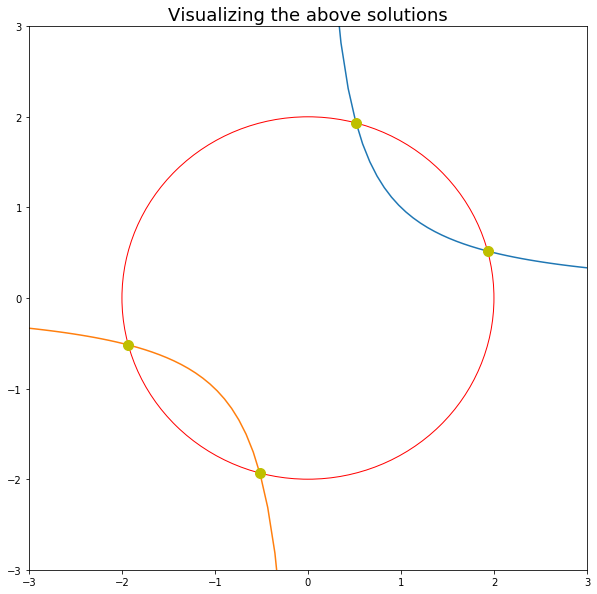

In [38]:
# And we can visualize the solutions with matplotlib
fig, ax = plt.subplots(figsize = (10, 10))
circle = plt.Circle( (0,0), 2, color = 'r', fill=False)

x1 = np.linspace(0.2, 4)
y1 = x1**(-1)
ax.plot(x1, y1, '-')

x2 = np.linspace(-4, -0.2)
y2 = x2**(-1)
ax.plot(x2, y2, '-')

ax.set_title('Visualizing the above solutions', fontsize=18)

# the roots we found with sympy, yellow dots.
ax.plot([sol[i][x].evalf(10) for i in range(len(sol))], [sol[i][y].evalf(10) for i in range(len(sol))], 'yo', markersize = 10)

fig.gca().add_artist(circle)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()